In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [54]:
import os
import pandas as pd
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import tensorflow as tf
import time
import zipfile
import os

from reportlab.lib.pagesizes import A4
from reportlab.platypus import Paragraph, SimpleDocTemplate, Spacer
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.enums import TA_CENTER, TA_LEFT

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.applications import ResNet50

from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Input

from tensorflow.keras.callbacks import EarlyStopping



In [2]:
def read_dataset(data_dir):
    filepaths = []
    labels = []

    for label_name in os.listdir(data_dir):
        label_folder = os.path.join(data_dir, label_name)
        if os.path.isdir(label_folder):
            images = glob(os.path.join(label_folder, '*.jpg'))  # or '*.png'
            filepaths.extend(images)
            labels.extend([label_name] * len(images))

    return pd.DataFrame({'filepath': filepaths, 'label': labels})

# Path to the dataset on Kaggle (adjust based on your dataset folder name)
base_path = '/kaggle/input/brain-tumor-mri-dataset'

train_dir = os.path.join(base_path, 'Training')
test_dir = os.path.join(base_path, 'Testing')

df_train = read_dataset(train_dir)
df_test = read_dataset(test_dir)

print(df_train.head())
print(df_test.head())

                                            filepath      label
0  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
1  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
2  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
3  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
4  /kaggle/input/brain-tumor-mri-dataset/Training...  pituitary
                                            filepath      label
0  /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
1  /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
2  /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
3  /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary
4  /kaggle/input/brain-tumor-mri-dataset/Testing/...  pituitary


In [3]:
df_train = read_dataset(train_dir)
df_test = read_dataset(test_dir)

print("Train samples:", len(df_train))
print("Test samples:", len(df_test))

df_train.head()


Train samples: 5712
Test samples: 1311


,filepath,label
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary


In [4]:
#check image Format
df_train['extension'] = df_train['filepath'].apply(lambda x: os.path.splitext(x)[-1].lower())
print("Unique image formats in training set:", df_train['extension'].unique())
print(df_train['extension'].value_counts())

print("="*60)

df_test['extension'] = df_test['filepath'].apply(lambda x: os.path.splitext(x)[-1].lower())
print("Unique image formats in training set:", df_test['extension'].unique())
print(df_test['extension'].value_counts())


Unique image formats in training set: ['.jpg']
extension
.jpg    5712
Name: count, dtype: int64
Unique image formats in training set: ['.jpg']
extension
.jpg    1311
Name: count, dtype: int64


In [5]:
df_train.columns

Index(['filepath', 'label', 'extension'], dtype='object')

In [6]:
df_train

,filepath,label,extension
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary,.jpg
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary,.jpg
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary,.jpg
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary,.jpg
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary,.jpg
...,...,...,...
5707,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma,.jpg
5708,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma,.jpg
5709,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma,.jpg
5710,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma,.jpg


In [7]:
df_test

,filepath,label,extension
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary,.jpg
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary,.jpg
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary,.jpg
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary,.jpg
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary,.jpg
...,...,...,...
1306,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma,.jpg
1307,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma,.jpg
1308,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma,.jpg
1309,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma,.jpg


In [8]:
df_train.drop(columns=['extension'],inplace=True)
df_test.drop(columns=['extension'],inplace=True)

In [9]:
df_train

,filepath,label
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
...,...,...
5707,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5708,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5709,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5710,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma


In [10]:
df_test

,filepath,label
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
...,...,...
1306,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1307,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1308,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1309,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma


label
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64


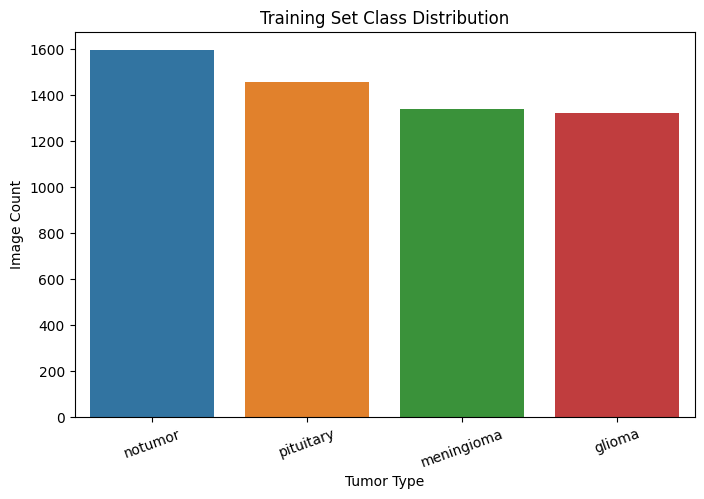

In [11]:
# Check Class Balance
print(df_train['label'].value_counts())
print("="*60)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='label', order=df_train['label'].value_counts().index)
plt.title("Training Set Class Distribution")
plt.xlabel("Tumor Type")
plt.ylabel("Image Count")
plt.xticks(rotation=20)
plt.show()

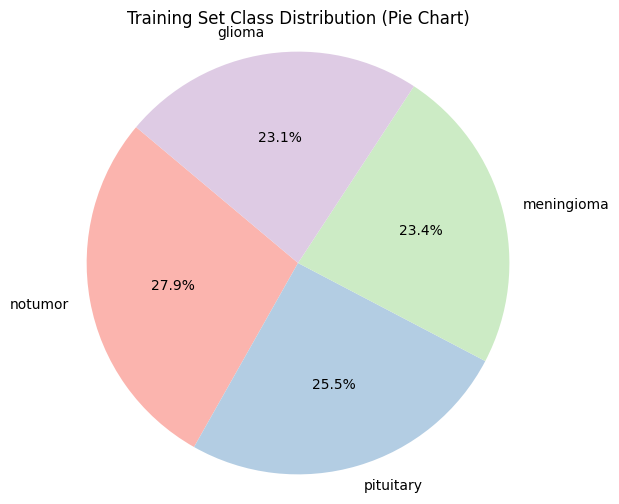

In [12]:
#pie chart for label
label_counts = df_train['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Training Set Class Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

### 🧠 Class Distribution Analysis

We analyzed the class distribution of the training set using a pie chart. The dataset includes four tumor categories:

- **Glioma**  
- **Meningioma**  
- **Pituitary**  
- **No Tumor**

The proportions of each class are relatively even, indicating that the dataset is fairly **balanced**. This is important because it **reduces the risk of model bias** toward any particular class and allows for more **reliable performance** across all categories.


<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
Data Preprocessing
</h3>


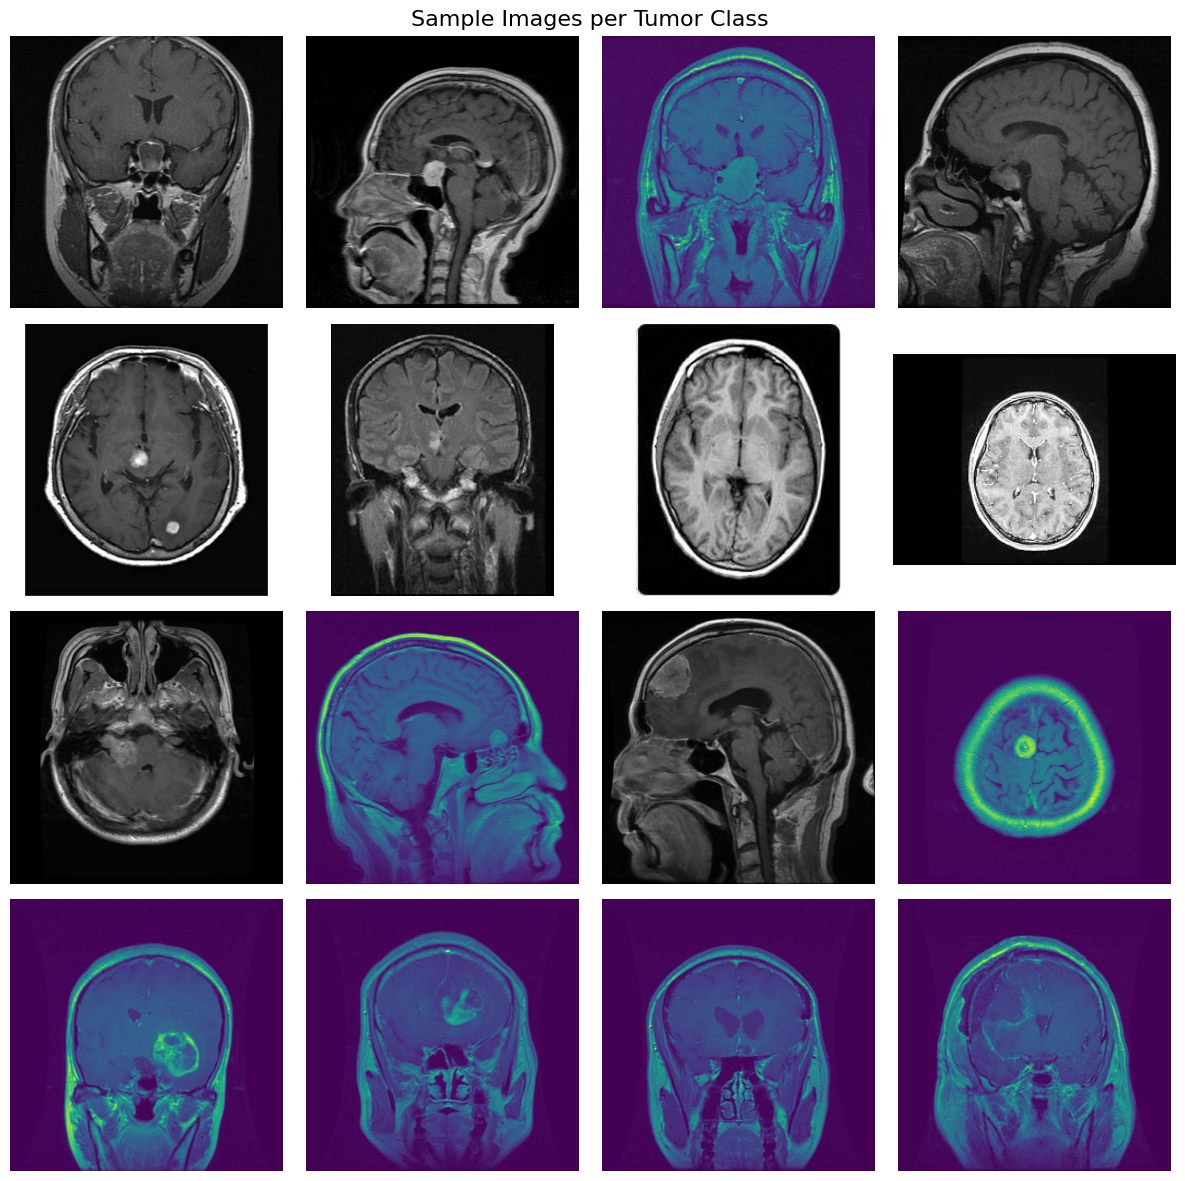

In [13]:
# visualize
def show_samples_per_class(df, classes, n=3):
    plt.figure(figsize=(n * 3, len(classes) * 3))

    for row_idx, label in enumerate(classes):

        class_images = df[df['label'] == label].sample(n, random_state=42)['filepath'].values

        for col_idx, img_path in enumerate(class_images):
            index = row_idx * n + col_idx + 1
            plt.subplot(len(classes), n, index)
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis('off')
            if col_idx == 0:
                plt.ylabel(label, fontsize=12)

    plt.suptitle("Sample Images per Tumor Class", fontsize=16)
    plt.tight_layout()
    plt.show()


unique_classes = df_train['label'].unique()
show_samples_per_class(df_train, unique_classes, n=4)


<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
DNN Model Implementation From Scratch
</h3>


In [14]:

IMG_SIZE = (150, 150)  

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5712 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


In [15]:
train_generator

In [16]:
dnn_model = Sequential([
    Flatten(input_shape=(150, 150, 3)),   
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

dnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

I0000 00:00:1752785053.770605      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [17]:

history_dnn = dnn_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=32,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

Epoch 1/32


I0000 00:00:1752785071.972838     101 service.cc:148] XLA service 0x7df1440049d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752785071.973519     101 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752785072.240870     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/179 ━━━━━━━━━━━━━━━━━━━━ 11:09 4s/step - accuracy: 0.2812 - loss: 1.6666

I0000 00:00:1752785073.821698     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 230ms/step - accuracy: 0.3784 - loss: 6.8561 - val_accuracy: 0.6117 - val_loss: 1.1761
Epoch 2/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.4744 - loss: 1.1910 - val_accuracy: 0.6735 - val_loss: 0.9531
Epoch 3/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.4424 - loss: 1.1950 - val_accuracy: 0.4996 - val_loss: 1.1523
Epoch 4/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.3656 - loss: 1.2785 - val_accuracy: 0.6720 - val_loss: 0.9340
Epoch 5/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.5024 - loss: 1.1110 - val_accuracy: 0.5553 - val_loss: 1.0923
Epoch 6/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.4868 - loss: 1.1233 - val_accuracy: 0.6880 - val_loss: 0.8759
Epoch 7/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.5112 - loss: 1.0750 - val_accuracy: 0.6697 - val_loss: 0.9048
Epoch 8/32
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - accuracy: 0.5108 - loss: 1.0912 - val_accura

<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
Evaluation Of DNN Frrom Scratch
</h3>


In [18]:
train_loss, train_acc = dnn_model.evaluate(train_generator, steps=len(train_generator), verbose=0)
test_loss, test_acc = dnn_model.evaluate(test_generator, steps=len(test_generator), verbose=0)

print("=" * 60)
print(f"Train Accuracy : {train_acc * 100:.2f}%")
print(f"Train Loss     : {train_loss:.4f}")
print("-" * 60)
print(f"Test Accuracy  : {test_acc * 100:.2f}%")
print(f"Test Loss      : {test_loss:.4f}")
print("=" * 60)


Train Accuracy : 66.32%
Train Loss     : 0.7966
------------------------------------------------------------
Test Accuracy  : 62.17%
Test Loss      : 0.8843


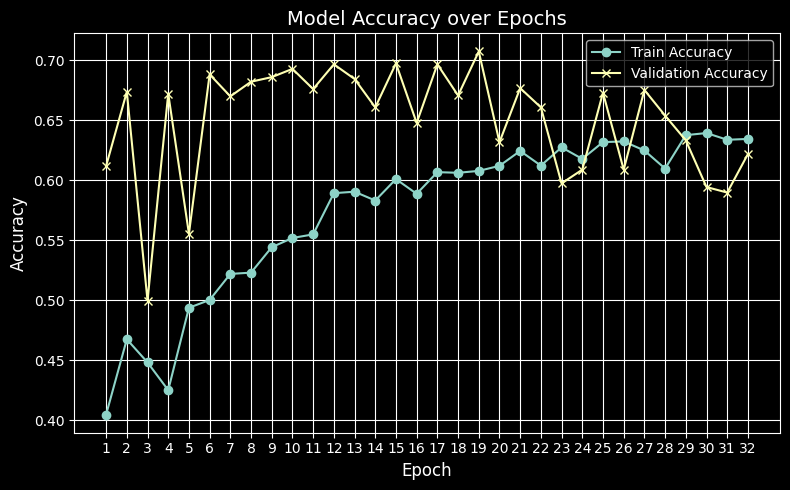

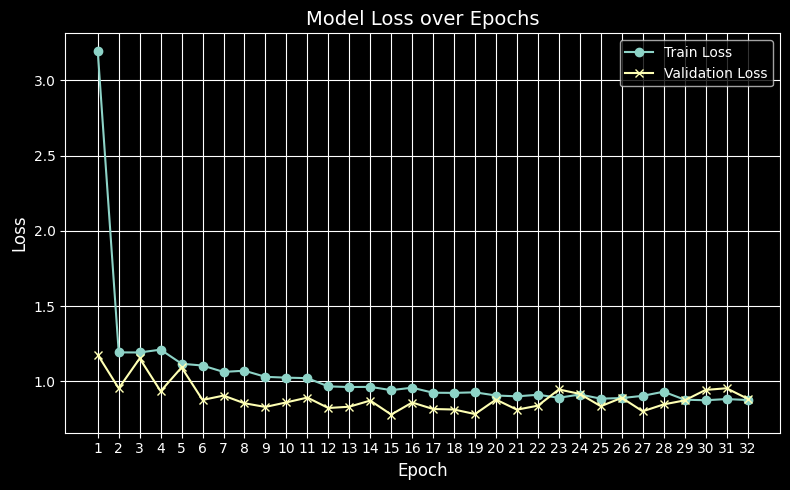

In [19]:

plt.style.use('dark_background')  

epochs = range(1, len(history_dnn.history['accuracy']) + 1)


plt.figure(figsize=(8, 5))
plt.plot(epochs, history_dnn.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(epochs, history_dnn.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.xticks(epochs)
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(epochs, history_dnn.history['loss'], label='Train Loss', marker='o')
plt.plot(epochs, history_dnn.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.xticks(epochs)
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:

print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [21]:
y_pred_probs = dnn_model.predict(test_generator, steps=len(test_generator), verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())


In [22]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

      glioma       0.44      0.94      0.60       300
  meningioma       0.11      0.02      0.03       306
     notumor       0.96      0.59      0.73       405
   pituitary       0.80      0.96      0.87       300

    accuracy                           0.62      1311
   macro avg       0.57      0.63      0.56      1311
weighted avg       0.60      0.62      0.57      1311



Confusion Matrix:
 [[282   2   0  16]
 [234   6  11  55]
 [115  49 239   2]
 [ 12   0   0 288]]


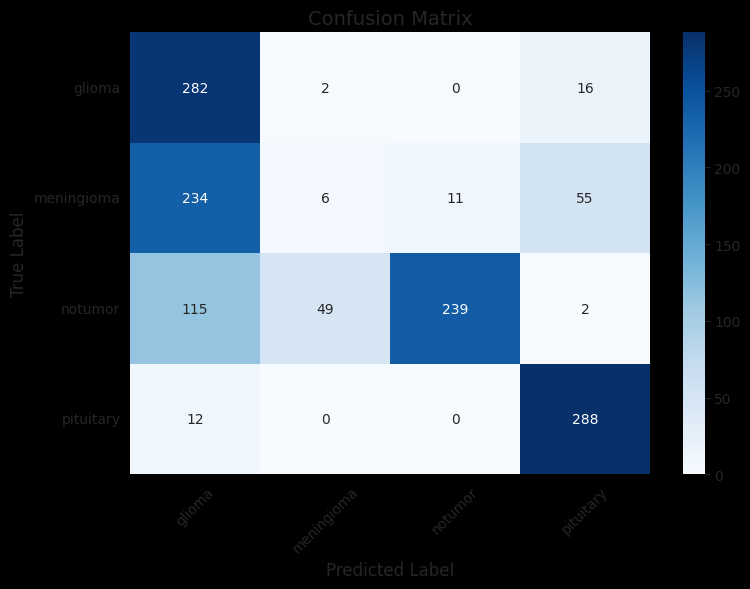

In [23]:
print('=' * 70)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print('=' * 70)
plt.figure(figsize=(8, 6))
sns.set_style("white")  

print('=' * 70)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


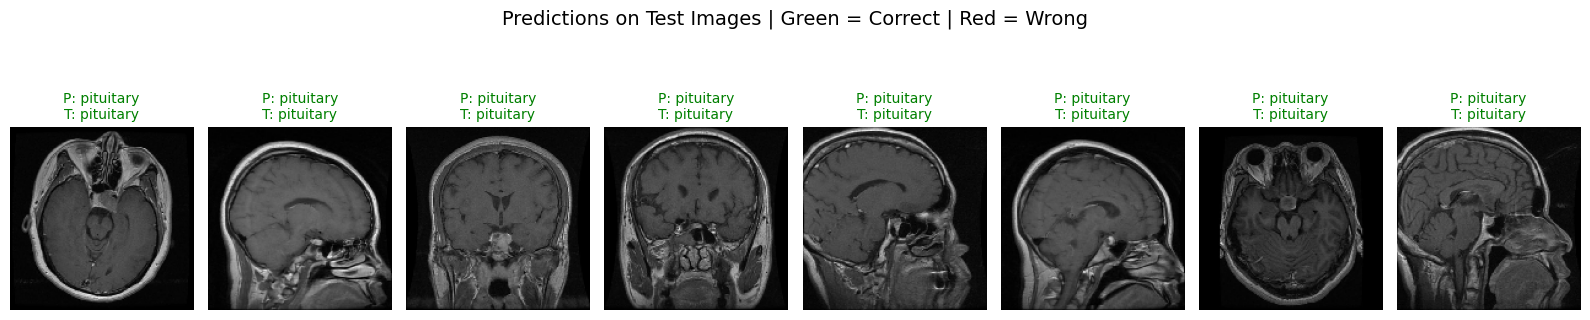

In [24]:

x_test, y_true_onehot = next(iter(test_generator))
y_true = np.argmax(y_true_onehot, axis=1)

# Predict on that batch
y_pred_probs = dnn_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)


class_names = list(test_generator.class_indices.keys())

n = 8
indices = np.random.choice(len(x_test), size=n, replace=False)

plt.figure(figsize=(16, 4))
for i, idx in enumerate(indices):
    img = x_test[idx]
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]

    
    img_disp = (img * 255).astype("uint8") if img.max() <= 1.0 else img.astype("uint8")

    plt.subplot(1, n, i + 1)
    plt.imshow(img_disp)
    plt.axis('off')

    
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"P: {pred_label}\nT: {true_label}", color=color, fontsize=10)

plt.suptitle("Predictions on Test Images | Green = Correct | Red = Wrong", fontsize=14, color='black')
plt.tight_layout()
plt.show()


<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
CNN Model Implementation From Scratch
</h3>


In [26]:


selected_epochs = 25

def Model(activation_fn='relu', dropout_rate_1=0.4, dropout_rate_2=0.4):
    model = tf.keras.models.Sequential()


    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=activation_fn, input_shape=(224, 224, 3)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation=activation_fn))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=activation_fn))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    
    if dropout_rate_1 > 0:
        model.add(tf.keras.layers.Dropout(dropout_rate_1))

    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation=activation_fn))

    
    if dropout_rate_2 > 0:
        model.add(tf.keras.layers.Dropout(dropout_rate_2))

   
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    return model


In [40]:
def Compile_Train(model,
                  optimizer_choice='adam',
                  learning_rate=0.0001,
                  momentum=0.9,
                  train_generator=None,
                  val_generator=None,
                  epochs=selected_epochs):

    import tensorflow as tf
    import time
    import matplotlib.pyplot as plt

    
    if optimizer_choice == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    elif optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    
    start_time = time.time()
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs,
        steps_per_epoch=len(train_generator),
        validation_steps=len(val_generator),
        verbose=2,
       
    )
    total_time = time.time() - start_time

   
    test_loss, test_acc = model.evaluate(val_generator, steps=len(val_generator), verbose=0)

    
    print("="*60)
    print(f"Final Validation Accuracy: {test_acc:.4f}")
    print(f"Total Training Time: {total_time:.2f} seconds")

  
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'CNN Accuracy (Optimizer={optimizer_choice}, LR={learning_rate})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return history, test_acc



In [29]:
from sklearn.model_selection import train_test_split

df_train_split, df_val_split = train_test_split(
    df_train,
    test_size=0.2,
    stratify=df_train['label'],
    random_state=42
)


In [30]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = datagen.flow_from_dataframe(
    dataframe=df_train_split,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val_split,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,     
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.


Epoch 1/25
143/143 - 23s - 163ms/step - accuracy: 0.7402 - loss: 0.9865 - val_accuracy: 0.3368 - val_loss: 4.9739
Epoch 2/25
143/143 - 13s - 93ms/step - accuracy: 0.8595 - loss: 0.3822 - val_accuracy: 0.6789 - val_loss: 1.5331
Epoch 3/25
143/143 - 14s - 95ms/step - accuracy: 0.8989 - loss: 0.2628 - val_accuracy: 0.8478 - val_loss: 0.4023
Epoch 4/25
143/143 - 14s - 96ms/step - accuracy: 0.9332 - loss: 0.1872 - val_accuracy: 0.9221 - val_loss: 0.2265
Epoch 5/25
143/143 - 14s - 97ms/step - accuracy: 0.9501 - loss: 0.1385 - val_accuracy: 0.9090 - val_loss: 0.2364
Epoch 6/25
143/143 - 13s - 91ms/step - accuracy: 0.9610 - loss: 0.1054 - val_accuracy: 0.9405 - val_loss: 0.1600
Epoch 7/25
143/143 - 14s - 95ms/step - accuracy: 0.9674 - loss: 0.0872 - val_accuracy: 0.9405 - val_loss: 0.1851
Epoch 8/25
143/143 - 13s - 92ms/step - accuracy: 0.9779 - loss: 0.0619 - val_accuracy: 0.9440 - val_loss: 0.1749
Epoch 9/25
143/143 - 14s - 97ms/step - accuracy: 0.9823 - loss: 0.0503 - val_accuracy: 0.9326 -

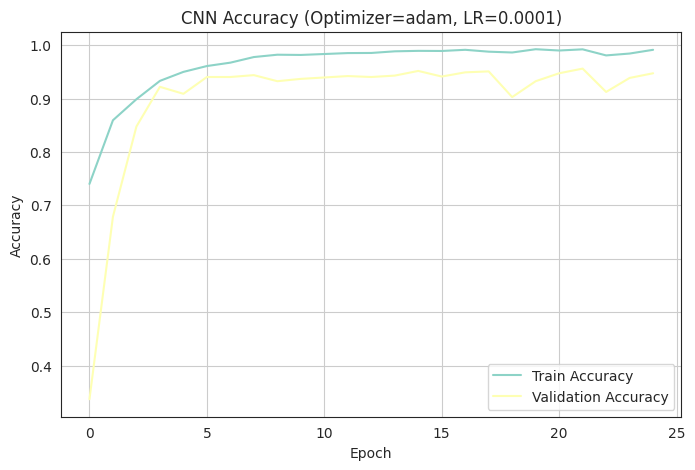

In [41]:
cnn_model = Model()
history, test_acc = Compile_Train(
    model=cnn_model,
    optimizer_choice='adam',
    learning_rate=0.0001,
    train_generator=train_generator,
    val_generator=val_generator,
    epochs=selected_epochs
)


In [42]:
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")
train_loss, train_acc = cnn_model.evaluate(train_generator)
print(f"Train Accuracy: {train_acc*100:.2f}%")


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9776 - loss: 0.1236
Test Accuracy: 94.81%
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 1.0000 - loss: 8.6416e-04
Train Accuracy: 99.98%


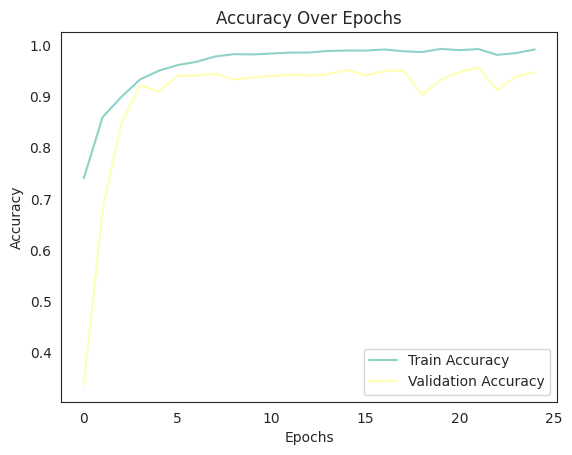

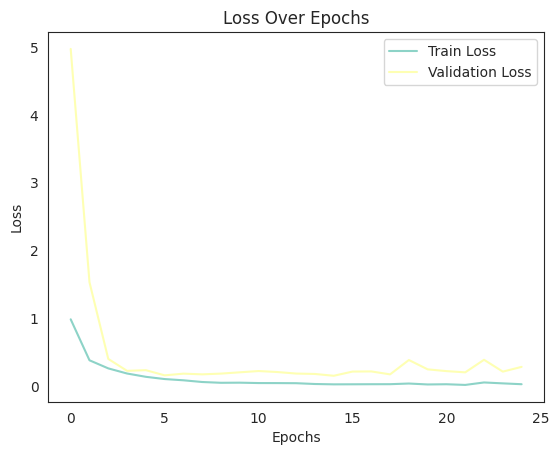

In [43]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


In [44]:
y_pred_probs = cnn_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step


In [45]:
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

      glioma       0.95      0.90      0.92       300
  meningioma       0.90      0.89      0.89       306
     notumor       0.96      1.00      0.98       405
   pituitary       0.98      0.99      0.99       300

    accuracy                           0.95      1311
   macro avg       0.95      0.94      0.95      1311
weighted avg       0.95      0.95      0.95      1311



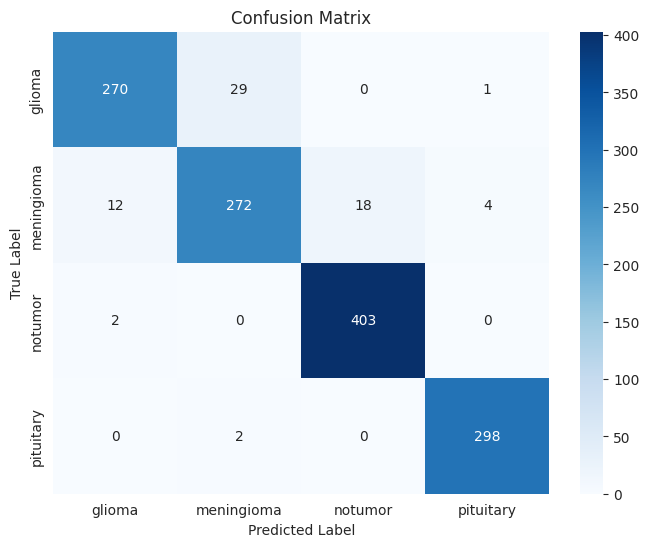

In [46]:

cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


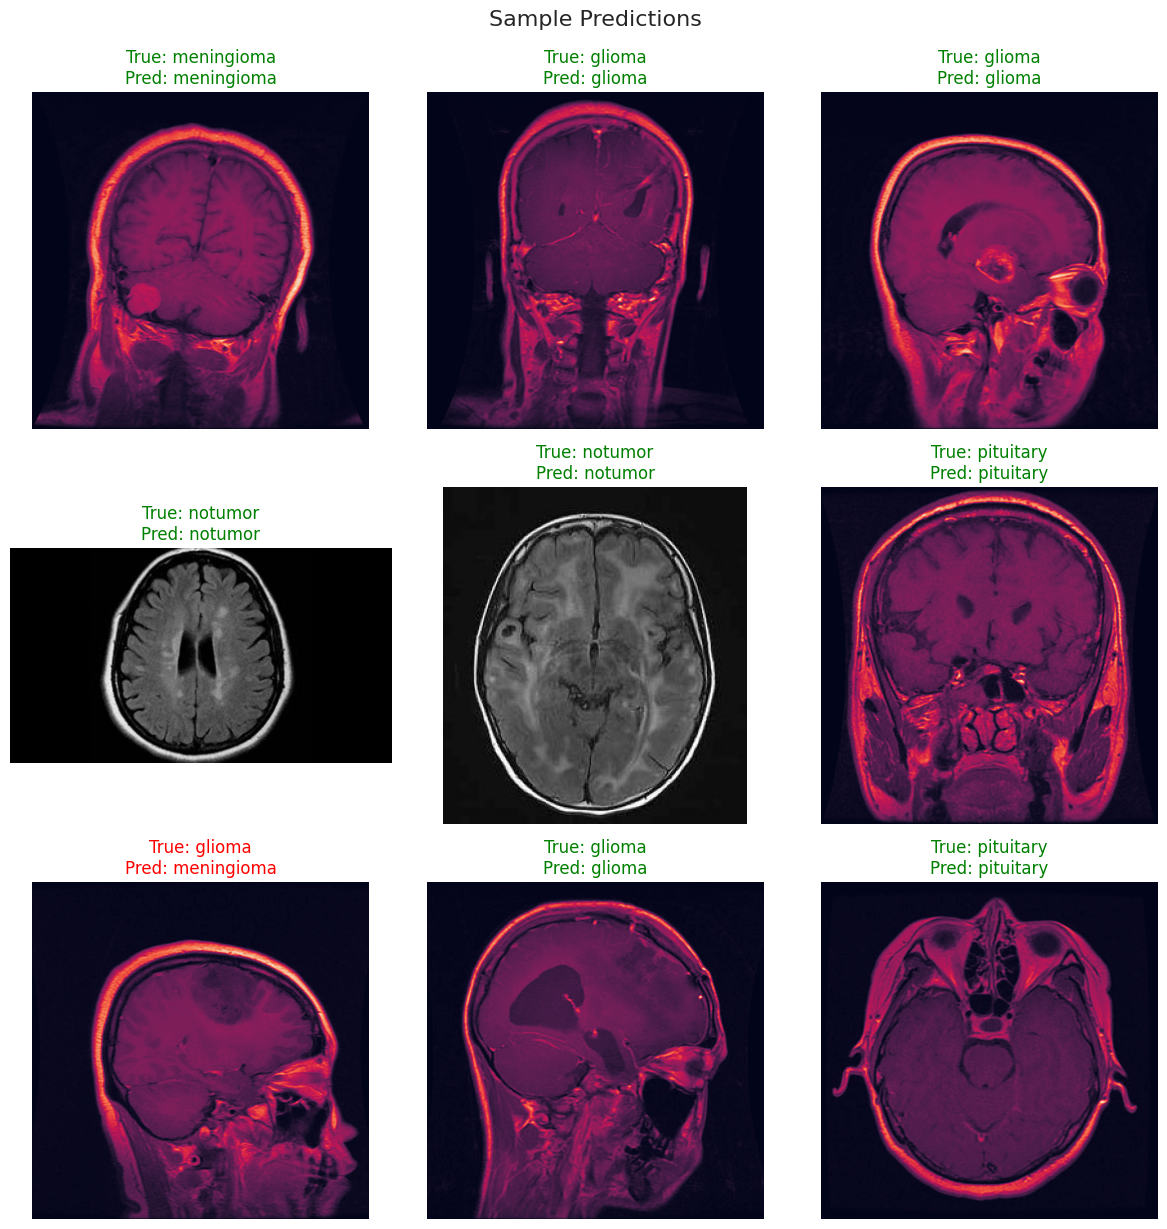

In [47]:
# Get filenames from generator
filenames = test_generator.filenames
sample_indexes = np.random.choice(len(filenames), 9, replace=False)

plt.figure(figsize=(12, 12))
for i, idx in enumerate(sample_indexes):
    image_path = test_generator.filepaths[idx]
    img = plt.imread(image_path)

    true_label = class_labels[y_true[idx]]
    pred_label = class_labels[y_pred_classes[idx]]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'True: {true_label}\nPred: {pred_label}', color='green' if true_label == pred_label else 'red')

plt.tight_layout()
plt.suptitle("Sample Predictions", fontsize=16, y=1.02)
plt.show()


In [48]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.2 MB/s eta 0:00:00a 0:00:01


In [ ]:

def generate_cnn_report_cnn_model(output_filename, model):
    total_params = model.count_params()

    # Create PDF
    doc = SimpleDocTemplate(output_filename, pagesize=A4)
    styles = getSampleStyleSheet()
    styles.add(ParagraphStyle(name='TitleStyle', fontSize=18, alignment=TA_CENTER, spaceAfter=20))
    styles.add(ParagraphStyle(name='HeadingStyle', fontSize=14, spaceAfter=10, spaceBefore=10))
    styles.add(ParagraphStyle(name='BodyStyle', fontSize=11, leading=16, alignment=TA_LEFT))

    story = []

    # Title
    story.append(Paragraph("📄 CNN Model Architecture Report", styles['TitleStyle']))

    # Architecture Info
    story.append(Paragraph("1. Model Summary", styles['HeadingStyle']))

    for layer in model.layers:
        output_shape = getattr(layer, 'output_shape', 'N/A')
        params = layer.count_params()
        story.append(Paragraph(
            f"{layer.name}: Output Shape = {output_shape}, Params = {params}", styles['BodyStyle']))

    story.append(Spacer(1, 12))

    # Params
    story.append(Paragraph("2. Total Trainable Parameters", styles['HeadingStyle']))
    story.append(Paragraph(f"<b>{total_params:,}</b> parameters", styles['BodyStyle']))

    # Build PDF
    doc.build(story)
    print(f"✅ Report saved as: {output_filename}")


In [50]:
def generate_cnn_report_cnn_model(output_filename, model):
    total_params = model.count_params()

    # Create PDF
    doc = SimpleDocTemplate(output_filename, pagesize=A4)
    styles = getSampleStyleSheet()
    styles.add(ParagraphStyle(name='TitleStyle', fontSize=18, alignment=TA_CENTER, spaceAfter=20))
    styles.add(ParagraphStyle(name='HeadingStyle', fontSize=14, spaceAfter=10, spaceBefore=10))
    styles.add(ParagraphStyle(name='BodyStyle', fontSize=11, leading=16, alignment=TA_LEFT))

    story = []

    # Title
    story.append(Paragraph("📄 CNN Model Architecture Report", styles['TitleStyle']))

    # Architecture Info
    story.append(Paragraph("1. Model Summary", styles['HeadingStyle']))

    for layer in model.layers:
        output_shape = getattr(layer, 'output_shape', 'N/A')
        params = layer.count_params()
        story.append(Paragraph(
            f"{layer.name}: Output Shape = {output_shape}, Params = {params}", styles['BodyStyle']))

    story.append(Spacer(1, 12))

    # Params
    story.append(Paragraph("2. Total Trainable Parameters", styles['HeadingStyle']))
    story.append(Paragraph(f"<b>{total_params:,}</b> parameters", styles['BodyStyle']))

    # Build PDF
    doc.build(story)
    print(f"✅ Report saved as: {output_filename}")


In [51]:
generate_cnn_report_cnn_model(
    output_filename="cnn_model_architecture_report.pdf",
    model=cnn_model
)


✅ Report saved as: cnn_model_architecture_report.pdf


<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
VGG16 
</h3>


In [59]:

df_full = pd.concat([df_train, df_test], ignore_index=True)


In [65]:

df_train_full, df_test = train_test_split(
    df_full,
    test_size=0.15,
    stratify=df_full['label'],
    random_state=42
)


df_train, df_val = train_test_split(
    df_train_full,
    test_size=0.2,
    stratify=df_train_full['label'],
    random_state=42
)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 4775 validated image filenames belonging to 4 classes.
Found 1194 validated image filenames belonging to 4 classes.
Found 1054 validated image filenames belonging to 4 classes.


In [66]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
base_model.trainable = False  


In [67]:
x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=output)


In [68]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stop]
)


Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 67s 419ms/step - accuracy: 0.3186 - loss: 1.4376 - val_accuracy: 0.6348 - val_loss: 1.1035
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 373ms/step - accuracy: 0.5356 - loss: 1.1197 - val_accuracy: 0.7454 - val_loss: 0.8140
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 368ms/step - accuracy: 0.6583 - loss: 0.8797 - val_accuracy: 0.7814 - val_loss: 0.6629
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 370ms/step - accuracy: 0.7169 - loss: 0.7380 - val_accuracy: 0.7864 - val_loss: 0.6089
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 374ms/step - accuracy: 0.7483 - loss: 0.6606 - val_accuracy: 0.8157 - val_loss: 0.5433
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 372ms/step - accuracy: 0.7770 - loss: 0.6141 - val_accuracy: 0.8300 - val_loss: 0.5026
Epoch 7/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 373ms/step - accuracy: 0.7977 - loss: 0.5484 - val_accuracy: 0.8358 - val_loss: 0.4772
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 57s 376ms/step - accuracy: 0.8020 - loss: 0

In [70]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", round(test_acc * 100, 2), "%")
train_loss, train_acc = model.evaluate(train_generator)
print("Train Accuracy:", round(train_acc * 100, 2), "%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.8976 - loss: 0.3174
Test Accuracy: 88.52 %
150/150 ━━━━━━━━━━━━━━━━━━━━ 53s 353ms/step - accuracy: 0.8918 - loss: 0.3067
Train Accuracy: 88.8 %


<h3 style="background-color: #722323; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
ResNet
</h3>


In [71]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [72]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x) أ

model_resnet = Model(inputs=base_model.input, outputs=output)


In [73]:
model_resnet.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [74]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_resnet = model_resnet.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stop]
)


Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 81s 438ms/step - accuracy: 0.2846 - loss: 1.5334 - val_accuracy: 0.3970 - val_loss: 1.1960
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 366ms/step - accuracy: 0.4115 - loss: 1.2437 - val_accuracy: 0.6013 - val_loss: 1.1079
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 366ms/step - accuracy: 0.4687 - loss: 1.1576 - val_accuracy: 0.5511 - val_loss: 1.0893
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 366ms/step - accuracy: 0.4880 - loss: 1.1080 - val_accuracy: 0.5687 - val_loss: 1.0665
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 366ms/step - accuracy: 0.5019 - loss: 1.0826 - val_accuracy: 0.6089 - val_loss: 1.0239
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 368ms/step - accuracy: 0.5280 - loss: 1.0520 - val_accuracy: 0.6281 - val_loss: 1.0195
Epoch 7/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 367ms/step - accuracy: 0.5412 - loss: 1.0344 - val_accuracy: 0.6206 - val_loss: 0.9949
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 364ms/step - accuracy: 0.5750 - loss: 1

In [75]:
test_loss, test_acc = model_resnet.evaluate(test_generator)
print("Test Accuracy:", round(test_acc * 100, 2), "%")
train_loss, train_acc = model_resnet.evaluate(train_generator)
print("Train Accuracy:", round(train_acc * 100, 2), "%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.7417 - loss: 0.6929
Test Accuracy: 73.81 %
150/150 ━━━━━━━━━━━━━━━━━━━━ 53s 356ms/step - accuracy: 0.6577 - loss: 0.7885
Train Accuracy: 66.39 %
